In [1]:
import numpy as np
import pandas as pd
import pickle
import datetime
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

import tqdm

In [2]:
rfs = pickle.load(open('/home/robbie/Dropbox/cs2_processor/mean_rfs_v2.p','rb'))

rfdf = pd.DataFrame(rfs).T

rfdf

,10,20,30,40,50,60,70,80,90,Path,Buoy
0,0.568439,0.411956,0.335029,0.287062,0.253355,0.234251,0.207066,0.157204,0.057659,/home/robbie/cpom/cpnet/li4_raid6/cpdata/SATS/...,a
1,0.568439,0.411956,0.335029,0.287062,0.253355,0.234251,0.207066,0.157204,0.057659,/home/robbie/cpom/cpnet/li4_raid6/cpdata/SATS/...,b
2,0.431112,0.253951,0.172767,0.122274,0.078353,0.045668,-0.001649,-0.05892,-0.142753,/home/robbie/cpom/cpnet/li4_raid6/cpdata/SATS/...,d
3,0.602591,0.410431,0.314912,0.253219,0.210731,0.172166,0.132354,0.082939,0.009404,/home/robbie/cpom/cpnet/li4_raid6/cpdata/SATS/...,a
4,0.602591,0.410431,0.314912,0.253219,0.210731,0.172166,0.132354,0.082939,0.009404,/home/robbie/cpom/cpnet/li4_raid6/cpdata/SATS/...,b
...,...,...,...,...,...,...,...,...,...,...,...
4096,0.455352,0.298143,0.21374,0.159725,0.121425,0.08621,0.046847,-0.014067,-0.07989,/home/robbie/cpom/cpnet/li4_raid6/cpdata/SATS/...,b
4097,0.551573,0.40781,0.327965,0.277999,0.238486,0.202727,0.167967,0.119581,0.025162,/home/robbie/cpom/cpnet/li4_raid6/cpdata/SATS/...,d
4098,0.569948,0.439081,0.371508,0.330054,0.299056,0.27175,0.238474,0.194763,0.117363,/home/robbie/cpom/cpnet/li4_raid6/cpdata/SATS/...,a
4099,0.569948,0.439081,0.371508,0.330054,0.299056,0.27175,0.238474,0.194763,0.117363,/home/robbie/cpom/cpnet/li4_raid6/cpdata/SATS/...,b


In [3]:
df = pd.read_csv('/home/robbie/Dropbox/cs2_processor/hits.csv')
df['Year'] = [str(i[2:-1]) for i in df['Year']]
df['Month'] = [str(i[2:-1]).zfill(2) for i in df['Month']]
df['Filename'] = [i[2:-2] for i in df['Filename']]
df['Buoy'] = [i[1:] for i in df['Buoy']]
df['Day'] = [int(filename.split('1B')[1][1:9][-2:]) for filename in df['Filename']]

df['date'] = [datetime.date(int(y),int(m),int(d)) for (y,m,d) in zip(df['Year'],df['Month'],df['Day'])]


cpom_external = '/home/robbie/cpom'
cpom_internal = '/cpnet/li4_raid6/cpdata/SATS/RA/CRY/L1B/SAR/'

paths = []
for i in tqdm.trange(df.shape[0]):
    data = df.iloc[i]
    paths.append( f"{cpom_external}{cpom_internal}{data['Year']}/{data['Month']}/{data['Filename']}" )

df['Path'] = paths
df

100%|████████████████████████████████████| 4321/4321 [00:00<00:00, 23914.98it/s]


,Year,Month,Filename,Buoy,Index 0,Index -1,Day,date,Path
0,2010,10,CS_LTA__SIR_SAR_1B_20101001T064956_20101001T06...,a,994,1646,1,2010-10-01,/home/robbie/cpom/cpnet/li4_raid6/cpdata/SATS/...
1,2010,10,CS_LTA__SIR_SAR_1B_20101001T064956_20101001T06...,b,2209,2689,1,2010-10-01,/home/robbie/cpom/cpnet/li4_raid6/cpdata/SATS/...
2,2010,10,CS_LTA__SIR_SAR_1B_20101021T180754_20101021T18...,d,2468,1844,21,2010-10-21,/home/robbie/cpom/cpnet/li4_raid6/cpdata/SATS/...
3,2010,10,CS_LTA__SIR_SAR_1B_20101022T053432_20101022T05...,a,1286,1757,22,2010-10-22,/home/robbie/cpom/cpnet/li4_raid6/cpdata/SATS/...
4,2010,10,CS_LTA__SIR_SAR_1B_20101022T053432_20101022T05...,b,2299,2952,22,2010-10-22,/home/robbie/cpom/cpnet/li4_raid6/cpdata/SATS/...
...,...,...,...,...,...,...,...,...,...
4316,2021,12,CS_OFFL_SIR_SAR_1B_20211229T190247_20211229T19...,a,1303,1935,29,2021-12-29,/home/robbie/cpom/cpnet/li4_raid6/cpdata/SATS/...
4317,2021,12,CS_OFFL_SIR_SAR_1B_20211229T190247_20211229T19...,b,2422,3058,29,2021-12-29,/home/robbie/cpom/cpnet/li4_raid6/cpdata/SATS/...
4318,2021,12,CS_OFFL_SIR_SAR_1B_20211230T081848_20211230T08...,b,8880,8335,30,2021-12-30,/home/robbie/cpom/cpnet/li4_raid6/cpdata/SATS/...
4319,2021,12,CS_OFFL_SIR_SAR_1B_20211231T190055_20211231T19...,a,1243,1907,31,2021-12-31,/home/robbie/cpom/cpnet/li4_raid6/cpdata/SATS/...


In [4]:
list_of_dicts=[]

for key,dic in rfs.items():
    
    buoy = dic['Buoy']
    path = dic['Path']
    
    k = df[(df['Path']==path) & (df['Buoy']==buoy)].iloc[0]
    
    kd = k.to_dict()
    
    x = {**kd, **dic}
    
    list_of_dicts.append(x)

df = pd.DataFrame(list_of_dicts)

df

,Year,Month,Filename,Buoy,Index 0,Index -1,Day,date,Path,10,20,30,40,50,60,70,80,90
0,2010,10,CS_LTA__SIR_SAR_1B_20101001T064956_20101001T06...,a,994,1646,1,2010-10-01,/home/robbie/cpom/cpnet/li4_raid6/cpdata/SATS/...,0.568439,0.411956,0.335029,0.287062,0.253355,0.234251,0.207066,0.157204,0.057659
1,2010,10,CS_LTA__SIR_SAR_1B_20101001T064956_20101001T06...,b,2209,2689,1,2010-10-01,/home/robbie/cpom/cpnet/li4_raid6/cpdata/SATS/...,0.568439,0.411956,0.335029,0.287062,0.253355,0.234251,0.207066,0.157204,0.057659
2,2010,10,CS_LTA__SIR_SAR_1B_20101021T180754_20101021T18...,d,2468,1844,21,2010-10-21,/home/robbie/cpom/cpnet/li4_raid6/cpdata/SATS/...,0.431112,0.253951,0.172767,0.122274,0.078353,0.045668,-0.001649,-0.058920,-0.142753
3,2010,10,CS_LTA__SIR_SAR_1B_20101022T053432_20101022T05...,a,1286,1757,22,2010-10-22,/home/robbie/cpom/cpnet/li4_raid6/cpdata/SATS/...,0.602591,0.410431,0.314912,0.253219,0.210731,0.172166,0.132354,0.082939,0.009404
4,2010,10,CS_LTA__SIR_SAR_1B_20101022T053432_20101022T05...,b,2299,2952,22,2010-10-22,/home/robbie/cpom/cpnet/li4_raid6/cpdata/SATS/...,0.602591,0.410431,0.314912,0.253219,0.210731,0.172166,0.132354,0.082939,0.009404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4095,2021,03,CS_OFFL_SIR_SAR_1B_20210328T214937_20210328T21...,b,8010,7366,28,2021-03-28,/home/robbie/cpom/cpnet/li4_raid6/cpdata/SATS/...,0.455352,0.298143,0.213740,0.159725,0.121425,0.086210,0.046847,-0.014067,-0.079890
4096,2021,03,CS_OFFL_SIR_SAR_1B_20210329T205915_20210329T21...,d,9234,8575,29,2021-03-29,/home/robbie/cpom/cpnet/li4_raid6/cpdata/SATS/...,0.551573,0.407810,0.327965,0.277999,0.238486,0.202727,0.167967,0.119581,0.025162
4097,2021,03,CS_OFFL_SIR_SAR_1B_20210330T083116_20210330T08...,a,1233,1479,30,2021-03-30,/home/robbie/cpom/cpnet/li4_raid6/cpdata/SATS/...,0.569948,0.439081,0.371508,0.330054,0.299056,0.271750,0.238474,0.194763,0.117363
4098,2021,03,CS_OFFL_SIR_SAR_1B_20210330T083116_20210330T08...,b,2138,2778,30,2021-03-30,/home/robbie/cpom/cpnet/li4_raid6/cpdata/SATS/...,0.569948,0.439081,0.371508,0.330054,0.299056,0.271750,0.238474,0.194763,0.117363


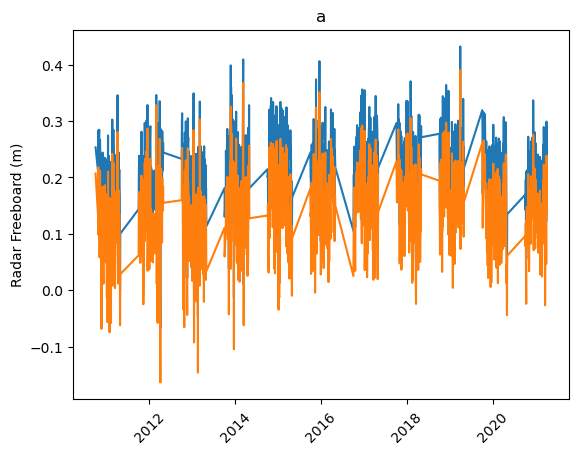

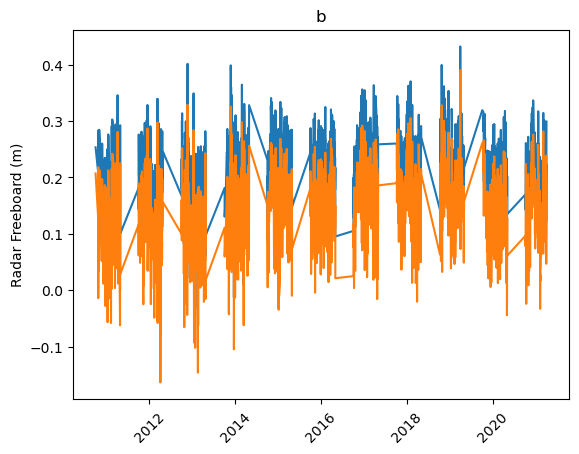

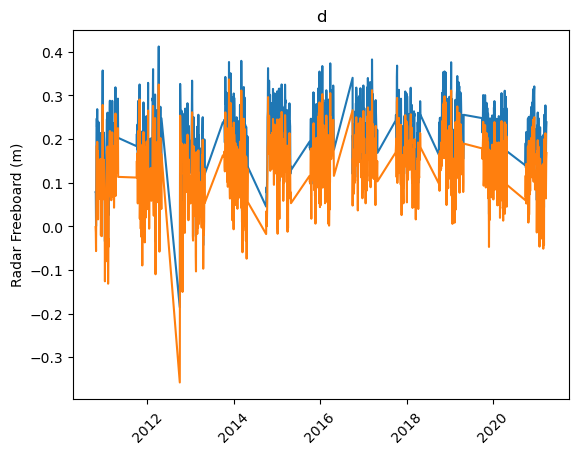

In [5]:
for b in ['a','b','d']:

    buoydata = df[df['Buoy']==b]

    plt.plot(buoydata['date'],buoydata[50])
    plt.plot(buoydata['date'],buoydata[70])
    plt.title(b)
    plt.ylabel('Radar Freeboard (m)')
    plt.xticks(rotation=45)
    plt.show()

In [6]:
rfdf.drop(columns=['Path','Buoy'])

,10,20,30,40,50,60,70,80,90
0,0.568439,0.411956,0.335029,0.287062,0.253355,0.234251,0.207066,0.157204,0.057659
1,0.568439,0.411956,0.335029,0.287062,0.253355,0.234251,0.207066,0.157204,0.057659
2,0.431112,0.253951,0.172767,0.122274,0.078353,0.045668,-0.001649,-0.05892,-0.142753
3,0.602591,0.410431,0.314912,0.253219,0.210731,0.172166,0.132354,0.082939,0.009404
4,0.602591,0.410431,0.314912,0.253219,0.210731,0.172166,0.132354,0.082939,0.009404
...,...,...,...,...,...,...,...,...,...
4096,0.455352,0.298143,0.21374,0.159725,0.121425,0.08621,0.046847,-0.014067,-0.07989
4097,0.551573,0.40781,0.327965,0.277999,0.238486,0.202727,0.167967,0.119581,0.025162
4098,0.569948,0.439081,0.371508,0.330054,0.299056,0.27175,0.238474,0.194763,0.117363
4099,0.569948,0.439081,0.371508,0.330054,0.299056,0.27175,0.238474,0.194763,0.117363


In [7]:
rfs = pickle.load(open('/home/robbie/Dropbox/cs2_processor/mean_rfs_v2.p','rb'))

rfdf = pd.DataFrame(rfs).T.drop(columns=['Path','Buoy'])

rfdf

    

,10,20,30,40,50,60,70,80,90
0,0.568439,0.411956,0.335029,0.287062,0.253355,0.234251,0.207066,0.157204,0.057659
1,0.568439,0.411956,0.335029,0.287062,0.253355,0.234251,0.207066,0.157204,0.057659
2,0.431112,0.253951,0.172767,0.122274,0.078353,0.045668,-0.001649,-0.05892,-0.142753
3,0.602591,0.410431,0.314912,0.253219,0.210731,0.172166,0.132354,0.082939,0.009404
4,0.602591,0.410431,0.314912,0.253219,0.210731,0.172166,0.132354,0.082939,0.009404
...,...,...,...,...,...,...,...,...,...
4096,0.455352,0.298143,0.21374,0.159725,0.121425,0.08621,0.046847,-0.014067,-0.07989
4097,0.551573,0.40781,0.327965,0.277999,0.238486,0.202727,0.167967,0.119581,0.025162
4098,0.569948,0.439081,0.371508,0.330054,0.299056,0.27175,0.238474,0.194763,0.117363
4099,0.569948,0.439081,0.371508,0.330054,0.299056,0.27175,0.238474,0.194763,0.117363


In [8]:
rho_w = 1023
rho_fyi, rho_myi = 916.7, 882 


myi_fac = rho_w/(rho_w-rho_myi)

fyi_fac = rho_w/(rho_w-rho_fyi)

In [9]:
myi_fac,fyi_fac

(7.25531914893617, 9.623706491063034)

In [11]:

# CPOM 0.55 & AWI 0.81 m too low

awibias = 0.95
cpombias= 0.75

MYI
product:AWI
bias:0.95
threshold:50
Shift:24.600000000000055
New Threshold:25.399999999999945

FYI
product:AWI
bias:0.95
threshold:50
Shift:20.300000000000068
New Threshold:29.699999999999932

MYI
product:CPOM
bias:0.75
threshold:70
Shift:28.400000000000112
New Threshold:41.59999999999989

FYI
product:CPOM
bias:0.75
threshold:70
Shift:22.300000000000132
New Threshold:47.69999999999987



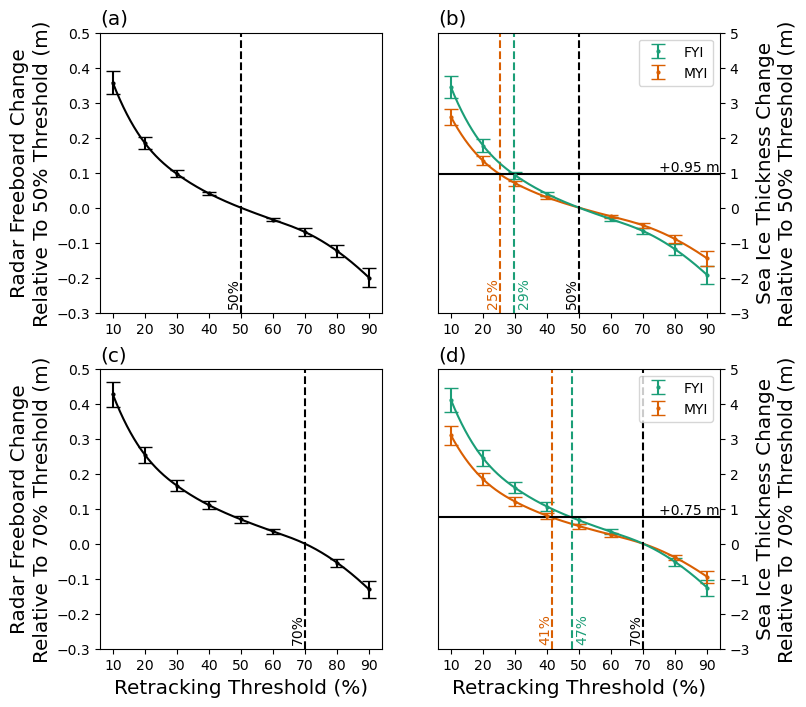

In [17]:
c1 = '#d95f02'; c2 = '#1b9e77'

xi = np.arange(10,90.1,0.1)

thresholds=np.arange(10,100,10)

threshold_dict = {}
    


fig, axs = plt.subplots(2,2,figsize=(8,8))

axa,axb,axc,axd = axs.reshape(-1)

splines = {}
    
for threshold, bias, group, ax1, ax2 in zip([50, 70],[awibias,cpombias],['AWI','CPOM'],[axa,axc],[axb,axd]):
    
    threshold_dict[threshold] = {}

    list_of_lists = []

    for i in range(rfdf.shape[0]):

        row = rfdf.iloc[i]

        list_of_lists.append(np.array(row).astype(np.float32)-float(row[threshold]))

    y = np.array(list_of_lists)    

    means = np.nanmean(y,axis=0)
    stds = np.nanstd(y,axis=0)
    
    cs = CubicSpline(thresholds,means)
    
    ax1.plot(xi,cs(xi),color='k')
    
    
    ax1.errorbar(thresholds[thresholds!=threshold],
                 means[thresholds!=threshold],
                 yerr=stds[thresholds!=threshold],
                 marker='o',ms=2,capsize=5,linestyle='none',color='k')
    
    ax1.set_ylabel(f'Radar Freeboard Change\nRelative To {threshold}% Threshold (m)',fontsize='x-large')
    
    ax1.set_ylim(-0.3,0.5)


    fyi = means*fyi_fac; fyi_std = stds*fyi_fac
    myi = means*myi_fac; myi_std = stds*myi_fac


    thresholds=np.arange(10,100,10)

    ax2.errorbar(thresholds[thresholds!=threshold],
                 fyi[thresholds!=threshold],
                 yerr=fyi_std[thresholds!=threshold],
                 marker='o',ms=2,capsize=5,label='FYI',linestyle='none',color=c2)
    ax2.errorbar(thresholds[thresholds!=threshold],
                 myi[thresholds!=threshold],
                 yerr=myi_std[thresholds!=threshold],
                 marker='o',ms=2,capsize=5,label='MYI',linestyle='none',color=c1)

    ax2.set_ylabel(f'Sea Ice Thickness Change\nRelative To {threshold}% Threshold (m)',fontsize='x-large')

    ax2.legend(loc='upper right')
#     plt.show()



    # MYI

    cs = CubicSpline(thresholds,myi)

    spline = cs(xi)
    
    splines[threshold]=spline

    ax2.plot(xi,spline,color=c1)

#     plt.scatter(thresholds,myi)

#     plt.show()
    t = xi[np.where(spline<bias)[0][0]]
    
    
    print(f'MYI\nproduct:{group}\nbias:{bias}\nthreshold:{threshold}\nShift:{threshold-t}\nNew Threshold:{t}\n')
    
    
    threshold_dict[threshold]['MYI']=(t)

    ax2.axvline(t,color=c1,ls='--')

    ax2.annotate(f'{int(t)}%',rotation=90,xycoords='data',va='top',ha='right',xy=(t,-2),color=c1)


    # fYI

    cs = CubicSpline(thresholds,fyi)

    spline = cs(xi)

    ax2.plot(xi,spline,color=c2)
    
    t = xi[np.where(spline<bias)[0][0]]
    
    threshold_dict[threshold]['FYI']=(t)
    
    ax2.axvline(t,color=c2,ls='--')
    
    print(f'FYI\nproduct:{group}\nbias:{bias}\nthreshold:{threshold}\nShift:{threshold-t}\nNew Threshold:{t}\n')
    
    ax2.annotate(f'{int(t)}%',rotation=90,xycoords='data',va='top',xy=(t+1,-2),color=c2)

    ax2.axhline(bias,color='k',ls='-')
    
    ax2.set_ylim(-3,5)
    
    ax2.yaxis.tick_right()
    ax2.yaxis.set_label_position('right')
    
    for ax in (ax1,ax2):
        ax.set_xticks(thresholds)
#         ax.set_title(f'Relative to {threshold}%',fontsize='x-large')
        ax.axvline(threshold,color='k',ls='--')
        ax.set_xlabel('Retracking Threshold (%)',fontsize='x-large')

    ax2.annotate(f'{threshold}%',rotation=90,xycoords='data',va='top',ha='right',
                 color='k',xy=(threshold,-2))
    
    ax2.annotate(f'+{bias} m',rotation=0,xycoords='data',va='bottom',ha='right',
                 color='k',xy=(94,bias))

    ax1.annotate(f'{threshold}%',rotation=90,xycoords='data',va='top',ha='right',
                 color='k',xy=(threshold,-0.2))

for ax in (axa,axb):
    ax.set_xlabel('')
    
for ax,letter in zip(axs.reshape(-1),['a','b','c','d']):
    ax.annotate(xy=(0,1.03),text=f'({letter})',xycoords='axes fraction', fontsize='x-large')

plt.savefig('/home/robbie/Dropbox/Apps/Overleaf/Alpha Retracker/main_figs/retracking_adjustments.png',bbox_inches='tight',dpi=500)
    


In [23]:
1618 + 3807

5425

In [22]:
(3.1-2.6) /2.6

0.1923076923076923

In [18]:
np.arange(10,90.1,0.1)[600], np.arange(10,90.1,0.1)[400]

(69.99999999999979, 49.99999999999986)

In [19]:
(np.diff(splines[50])/0.1)[400]

-0.026362778124610027

In [20]:
(np.diff(splines[70])/0.1)[600]

-0.03113372641796102

In [ ]:
splines[50][600]

In [115]:
splines[70]

array([ 3.09555984e+00,  3.07856469e+00,  3.06167427e+00,  3.04488815e+00,
        3.02820589e+00,  3.01162704e+00,  2.99515117e+00,  2.97877784e+00,
        2.96250661e+00,  2.94633704e+00,  2.93026869e+00,  2.91430112e+00,
        2.89843389e+00,  2.88266657e+00,  2.86699871e+00,  2.85142987e+00,
        2.83595963e+00,  2.82058753e+00,  2.80531313e+00,  2.79013601e+00,
        2.77505571e+00,  2.76007181e+00,  2.74518386e+00,  2.73039142e+00,
        2.71569405e+00,  2.70109132e+00,  2.68658278e+00,  2.67216800e+00,
        2.65784653e+00,  2.64361795e+00,  2.62948180e+00,  2.61543765e+00,
        2.60148506e+00,  2.58762359e+00,  2.57385280e+00,  2.56017226e+00,
        2.54658152e+00,  2.53308014e+00,  2.51966769e+00,  2.50634373e+00,
        2.49310782e+00,  2.47995951e+00,  2.46689837e+00,  2.45392396e+00,
        2.44103584e+00,  2.42823358e+00,  2.41551672e+00,  2.40288484e+00,
        2.39033750e+00,  2.37787425e+00,  2.36549465e+00,  2.35319827e+00,
        2.34098467e+00,  

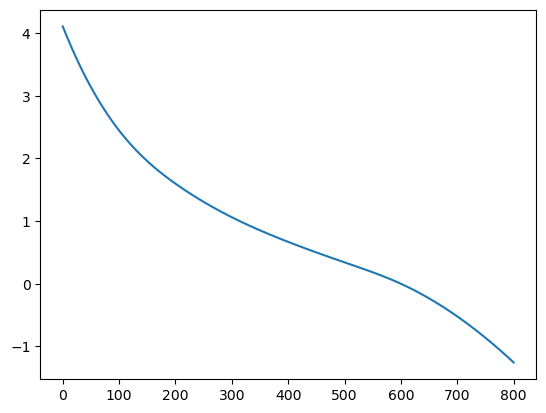

In [83]:
plt.plot(spline)

In [92]:
i

69.99999999999979

In [101]:
threshold

70

In [102]:
thresholds==threshold

array([False, False, False, False, False, False,  True, False, False])

In [106]:
gradient = np.diff(fyi)/10

gradient[thresholds==threshold]

IndexError: boolean index did not match indexed array along dimension 0; dimension is 8 but corresponding boolean dimension is 9

In [127]:
    
print(threshold_dict)

{50: {'MYI': 27.899999999999935, 'FYI': 31.999999999999922}, 70: {'MYI': 48.29999999999986, 'FYI': 53.499999999999844}}


In [128]:
for thresh in threshold_dict.keys():
    
    for icetype in threshold_dict[thresh].keys():
        
        print(thresh, icetype, thresh - threshold_dict[thresh][icetype])

50 MYI 22.100000000000065
50 FYI 18.000000000000078
70 MYI 21.700000000000138
70 FYI 16.500000000000156
